# Import the libraries and functions

In [1]:
import predictions_functions
from predictions_functions import *

Using TensorFlow backend.
/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gaura

# Import the data 

In [2]:
path_to_file = "/home/gaurav/Gaurav/Berlin/Deep_Learning/Developmental_data/data/Farrell_interpolation/farrell_data.csv"
adata = sc.read_csv(path_to_file).T

annotations = pd.read_csv("/home/gaurav/Gaurav/Berlin/Deep_Learning/Developmental_data/data/Farrell_interpolation/farrell_metadata.csv",index_col = ["Unnamed: 0"] )
adata.obs = annotations

# Filtering the data

In [3]:
sc.pp.filter_cells(adata, min_genes=1)
sc.pp.filter_genes(adata, min_cells=1)

# Splitting the training and test data

In [4]:

adata_78 = adata[adata.obs['segment'] == 78]
adata_74 = adata[adata.obs['segment'] == 74]
adata_71 = adata[adata.obs['segment'] == 71]

Segment_2 = adata_78.concatenate(adata_74,adata_71)

adata_78 = adata[adata.obs['segment'] == 78]
adata_75 = adata[adata.obs['segment'] == 75]
adata_62 = adata[adata.obs['segment'] == 62]

Segment_3 = adata_78.concatenate(adata_75,adata_62)

adata_79 = adata[adata.obs['segment'] == 79]
adata_29 = adata[adata.obs['segment'] == 29]
adata_32 = adata[adata.obs['segment'] == 32]

Segment_4 = adata_79.concatenate(adata_32)

## Training data
training_segment_2 = Segment_2.concatenate(Segment_4,Segment_3)

## Test data
adata_72 = adata[adata.obs['segment'] == 72]
Segment_1 = adata_72

# Training the VAE model

Provide the path to store the weights of trained VAE 

In [7]:
#scg_segment_2 = scgen.VAEArith(x_dimension= training_segment_2.shape[1], model_path="../model_segment__2/")
#scg_segment_2.train(train_data=training_segment_1, n_epochs=150)

# Import the VAE-trained model 

In [8]:
scg_segment_2 = scgen.VAEArith(x_dimension= training_segment_2.shape[1], model_path="/home/gaurav/Gaurav/Berlin/Deep_Learning/Experiment/PCA_UMAP/VAE_models/models/segment/model_segment__2/")
scg_segment_2.restore_model()

INFO:tensorflow:Restoring parameters from /home/gaurav/Gaurav/Berlin/Deep_Learning/Experiment/PCA_UMAP/VAE_models/models/segment/model_segment__2/


In [9]:
VAE_4 = Predictions( training_segment_2,Segment_1,4.3,4.7,"VAE+VA",scg_segment_2)
LI_4 = Predictions(training_segment_2,Segment_1,4.3,4.7,"LI",scg_segment_2)
PCA_4 = Predictions(training_segment_2,Segment_1,4.3,4.7,"PCA+VA",scg_segment_2)


Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


normalizing counts per cell
    finished (0:00:00)


Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


normalizing counts per cell
    finished (0:00:00)
computing PCA with n_comps = 100
    finished (0:00:23)


Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


normalizing counts per cell
    finished (0:00:00)


In [10]:
VAE_12 = Predictions(training_segment_2,Segment_1,4.3,12,"VAE+VA",scg_segment_2)
LI_12 = Predictions(training_segment_2,Segment_1,4.3,12,"LI",scg_segment_2)
PCA_12 = Predictions(training_segment_2,Segment_1,4.3,12,"PCA+VA",scg_segment_2)

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


normalizing counts per cell
    finished (0:00:00)


Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


normalizing counts per cell
    finished (0:00:00)
computing PCA with n_comps = 100
    finished (0:00:20)


Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


normalizing counts per cell
    finished (0:00:00)


# Analysis 

/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


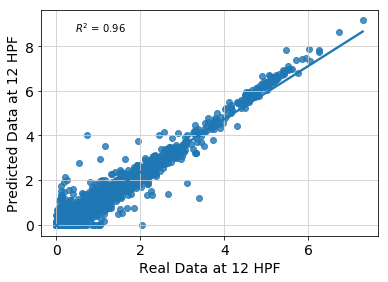

In [11]:
Plotting_Correlation(VAE_12,12)

/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


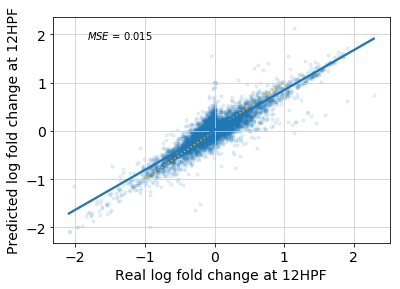

In [12]:
Log2Fold_change(VAE_12,4.3,12)


/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


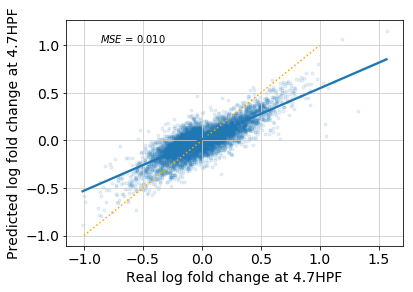

In [13]:
Log2Fold_change(VAE_4,4.3,4.7)


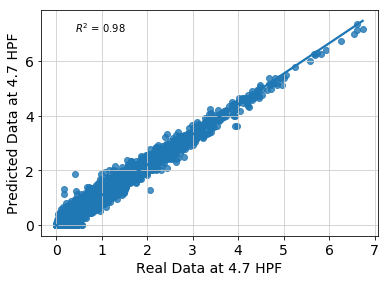

In [14]:
Plotting_Correlation(VAE_4,4.7)

/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)
/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)
/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)
/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)
/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)
/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/scipy/spatial/dista

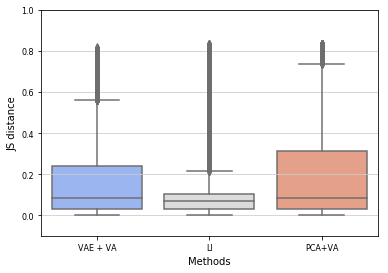

In [15]:
Box_Plot_JS(VAE_4,LI_4,PCA_4,4.7)

/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)
/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)
/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)
/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)
/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)
/home/gaurav/anaconda3/envs/Zebrafish/lib/python3.7/site-packages/scipy/spatial/dista

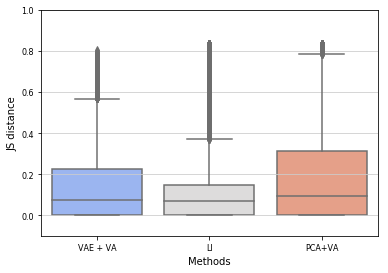

In [16]:
Box_Plot_JS(VAE_12,LI_12,PCA_12,12)